# BACKGROUND

BRICS is a group of emerging economies consisting of Brazil, Russia, India, China, and South Africa. Originally BRIC, it was introduced by Jim O'Neill in 2001, with South Africa joining in 2010. Text mining with the keyword "BRICS" is useful for analyzing trends, sentiment, and global issues related to the economy, trade, and geopolitics of its member countries, while also identifying discussion patterns across sources such as media, journals, and economic reports.

**PROBLEM STATEMENTS**

The growing discourse on BRICS in media and research is vast and unstructured, making manual analysis challenging. This study applies text mining to extract sentiment, key themes, and trends, providing insights into public perception, policy shifts, and economic impacts.

**GOALS**

Extract and analyze key insights from text data related to BRICS
- Identify frequent keywords and themes
- Perform sentiment analysis on BRICS-related discussions
- Analyze trends over time


**ANALYTICAL APPROACH**

The analytical approach of this study consists of 5 steps, such as:
- Text Scraping : Collecting data from websites, social media, or dataset files.
- Text Processing : Cleaning and preparing text (lowercase, stopwords removal, stemmine, etc.)
- Sentiment Analysis : Polarity sentiment using Indonesia sentiment Lexicon
- Feature Extraction : Converting text into numerical format (TF-IDF, Word Embeddings, etc.)
- Modelling : Applying Machine Learning or Deep Learning models for sentiment classification.

# IMPORT LIBRARY AND DATASET

In [943]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)

In [ ]:
df = pd.read_csv('brics_all.csv')
df

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1613 non-null   int64 
 1   created_at               1613 non-null   object
 2   favorite_count           1613 non-null   int64 
 3   full_text                1613 non-null   object
 4   id_str                   1613 non-null   int64 
 5   image_url                221 non-null    object
 6   in_reply_to_screen_name  880 non-null    object
 7   lang                     1613 non-null   object
 8   location                 819 non-null    object
 9   quote_count              1613 non-null   int64 
 10  reply_count              1613 non-null   int64 
 11  retweet_count            1613 non-null   int64 
 12  tweet_url                1613 non-null   object
 13  user_id_str              1613 non-null   int64 
 14  username                 1613 non-null  

# DATA CLEANING AND TEXT PROCESSING

The data source are tweets from X app, from 01-01-2024 to mid-february 2025, with semi-structured format : .csv. Raw data must be cleaned, tokenized, and standardized to improve accuracy in text mining models.

In this step, the scrapped data will be cleaned and pre-processed such as drop duplicate (duplicated data indicates buzzer's tweets), and processed by several steps :
- Converting to lower case
- Contraction
- Remove Number
- Remove Punctuation
- Remove White Space
- Remove Stop Words
- Lemmatization

In [825]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1505 entries, 0 to 1612
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1505 non-null   int64 
 1   created_at               1505 non-null   object
 2   favorite_count           1505 non-null   int64 
 3   full_text                1505 non-null   object
 4   id_str                   1505 non-null   int64 
 5   image_url                209 non-null    object
 6   in_reply_to_screen_name  822 non-null    object
 7   lang                     1505 non-null   object
 8   location                 757 non-null    object
 9   quote_count              1505 non-null   int64 
 10  reply_count              1505 non-null   int64 
 11  retweet_count            1505 non-null   int64 
 12  tweet_url                1505 non-null   object
 13  user_id_str              1505 non-null   int64 
 14  username                 1505 non-null   obje

Converting to lower case

In [828]:
def to_lower(text):
    return text.lower()

Contraction

In [831]:
import re

cList = {
    "gak": "tidak",
    "nggak": "tidak",
    "aku": "saya",
    "kamu": "anda",
    "gmn": "bagaimana",
    "tp": "tapi",
    "jd": "jadi",
    "dr": "dari",
    "hrs": "harus",
    "dg": "dengan",
    "tdk": "tidak",
    "krn": "karena",
    "dgn": "dengan",
    "bgt": "banget",
    "blm": "belum",
    "sy": "saya",
    "udh": "sudah",
    "sdh": "sudah",
    "lg": "lagi",
    "sbg": "sebagai",
    "mrk": "mereka",
    "spt": "seperti",
    "org": "orang",
    "kt": "kita",
    "yg": "yang",
    # FIX: "indo" should only change if it's a standalone word
    "indo": "indonesia",
    "mau": "ingin",
    "trs": "terus",
    "dlm": "dalam",
    "utk": "untuk",
    "prnh": "pernah",
    "td": "tadi",
    "bs": "bisa",
    "gpp": "tidak apa-apa",
    "gw": "saya",
    "lo": "anda",
    "dmn": "dimana"
}

# FIX: Exclude words that already contain "indonesia"
c_re = re.compile(r'\b(' + '|'.join(re.escape(k) for k in cList.keys() if k != "indo") + r')\b')

def contractions(text):
    # First, check if "indo" is a separate word before replacing it
    text = re.sub(r'\bindo\b', 'indonesia', text)  
    return c_re.sub(lambda match: cList[match.group(0)] , text)

# # Test Cases
# test_cases = [
#     "aku gmn nih, indo itu besar sekali di indonesia.",
#     "indonesia negara besar.",
#     "aku dari indo, suka indonesia banget!",
#     "indonesia adalah negara berkembang."
# ]

# for text in test_cases:
#     print(replace_contractions(text))

remove number

In [834]:
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

remove punctuation

In [837]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [839]:
def remove_punctuation(text):
    output = ''.join(c for c in text if c not in punctuation)
    return output

Remove White Space

In [842]:
def remove_white_space(text):
    output = ' '.join(text.split())
    return output

Remove Stop Words

In [845]:
import nltk
from nltk.corpus import stopwords

In [847]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Initialize stopword remover
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())  # Get default stop words list

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

In [849]:
#to lowercase
df['message_prep1']=df['full_text'].apply(to_lower)

#contraction
df['message_prep2']=df['message_prep1'].apply(contractions)

#remove number
df['message_prep3']=df['message_prep2'].apply(remove_number)

#remove punct
df['message_prep4']=df['message_prep3'].apply(remove_punctuation)

#remove white space
df['message_prep5']=df['message_prep4'].apply(remove_white_space)

#remove stop words
df['message_prep6']=df['message_prep5'].apply(remove_stopwords)

df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,retweet_count,tweet_url,user_id_str,username,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,1885095709575418047,Thu Jan 30 22:40:15 +0000 2025,2,Hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi Politik Indonesia Sebagai Anggota BRICS ..... narsumnya keren abis gaes jumat sore ini (31/1) .. Gasss https://t.co/ROGqdLtT8a,1885095709575418047,https://pbs.twimg.com/media/Gik0jrCbYAA4GIr.jpg,NaN,in,NaN,0,...,0,https://x.com/dpwprimajateng/status/1885095709575418047,1405306164749824000,dpwprimajateng,hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi politik indonesia sebagai anggota brics ..... narsumnya keren abis gaes jumat sore ini (31/1) .. gasss https://t.co/rogqdltt8a,hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi politik indonesia sebagai anggota brics ..... narsumnya keren abis gaes jumat sore ini (31/1) .. gasss https://t.co/rogqdltt8a,hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi politik indonesia sebagai anggota brics ..... narsumnya keren abis gaes jumat sore ini (/) .. gasss https://t.co/rogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia sebagai anggota brics narsumnya keren abis gaes jumat sore ini gasss httpstcorogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia sebagai anggota brics narsumnya keren abis gaes jumat sore ini gasss httpstcorogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia anggota brics narsumnya keren abis gaes jumat sore gasss httpstcorogqdltta
1,1884961547136680070,Thu Jan 30 13:47:08 +0000 2025,0,Ga salah indo gabung BRICS China gokil emang Kita kalah udah sejak pendidikan balita,1884961547136680070,NaN,NaN,in,Two Step From Hell,0,...,0,https://x.com/Lifetuneup/status/1884961547136680070,1235662090058137601,Lifetuneup,ga salah indo gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kalah udah sejak pendidikan balita
2,1884898657197228294,Thu Jan 30 11:02:17 +0000 2025,0,@CNNIndonesia gabung ke brics gasken,1884920062760653221,NaN,CNNIndonesia,in,NaN,0,...,0,https://x.com/3adhidon/status/1884920062760653221,1029360204805300226,3adhidon,@cnnindonesia gabung ke brics gasken,@cnnindonesia gabung ke brics gasken,@cnnindonesia gabung ke brics gasken,cnnindonesia gabung ke brics gasken,cnnindonesia gabung ke brics gasken,cnnindonesia gabung brics gasken
3,1884788735239221608,Thu Jan 30 10:50:59 +0000 2025,0,@tanyarlfes yg kayak gini gabung ke BRICS bisa-bisa disetir china,1884917218867343654,NaN,tanyarlfes,in,NaN,0,...,0,https://x.com/ggabiin_/status/1884917218867343654,1829065072209211394,ggabiin_,@tanyarlfes yg kayak gini gabung ke brics bisa-bisa disetir china,@tanyarlfes yang kayak gini gabung ke brics bisa-bisa disetir china,@tanyarlfes yang kayak gini gabung ke brics bisa-bisa disetir china,tanyarlfes yang kayak gini gabung ke brics bisabisa disetir china,tanyarlfes yang kayak gini gabung ke brics bisabisa disetir china,tanyarlfes kayak gini gabung brics bisabisa disetir china
4,1884316259074072944,Thu Jan 30 07:55:55 +0000 2025,0,@madokafc1 Langkah jokowi selalu sepuluh langkah kedepan sudah bisa memprediksi. Makanya doi pengen langsung gabung BRICS baru di approve blm lama ini.,1884873160153317754,NaN,madokafc1,in,NaN,0,...,0,https://x.com/areefin_putra/status/1884873160153317754,573

In [851]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize the stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

In [853]:
import re

lemma_dict = {
    "mendatang": "datang",
    "malahan": "malah",
    "setinggi": "tinggi",
    "larangan": "larang",
    "terlanjur": "lanjur",
    "dominasi": "dominan",
    "melanjutkan": "lanjut",
    "cepet": "cepat",
    "president": "presiden",
    "nkri": "indonesia",
    "berharga": "harga",
    "memulai": "mulai",
    "berada": "ada",
    "terbukti": "bukti",
    "terkecuali": "kecuali",
    "berdaya": "daya",
    "bersama": "sama",
    "mereda": "reda"
}

def lemmatize_text(text, lemma_dict=lemma_dict):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize text
    lemmatized_words = [lemma_dict.get(word, word) for word in words]  # Replace words if in dictionary
    return " ".join(lemmatized_words)  # Reconstruct text


In [855]:
#stemming
df['message_stem'] = df['message_prep6'].apply(stemming)

#lemmatizing
df['message_lemma'] = df['message_prep6'].apply(lemmatize_text)

df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,user_id_str,username,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_stem,message_lemma
0,1885095709575418047,Thu Jan 30 22:40:15 +0000 2025,2,Hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi Politik Indonesia Sebagai Anggota BRICS ..... narsumnya keren abis gaes jumat sore ini (31/1) .. Gasss https://t.co/ROGqdLtT8a,1885095709575418047,https://pbs.twimg.com/media/Gik0jrCbYAA4GIr.jpg,NaN,in,NaN,0,...,1405306164749824000,dpwprimajateng,hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi politik indonesia sebagai anggota brics ..... narsumnya keren abis gaes jumat sore ini (31/1) .. gasss https://t.co/rogqdltt8a,hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi politik indonesia sebagai anggota brics ..... narsumnya keren abis gaes jumat sore ini (31/1) .. gasss https://t.co/rogqdltt8a,hai gaes.... jangan lupa ikut gabung diskusi menarik yach... implementasi politik indonesia sebagai anggota brics ..... narsumnya keren abis gaes jumat sore ini (/) .. gasss https://t.co/rogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia sebagai anggota brics narsumnya keren abis gaes jumat sore ini gasss httpstcorogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia sebagai anggota brics narsumnya keren abis gaes jumat sore ini gasss httpstcorogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia anggota brics narsumnya keren abis gaes jumat sore gasss httpstcorogqdltta,hai gaes jangan lupa ikut gabung diskusi tarik yach implementasi politik indonesia anggota brics narsumnya keren abis gaes jumat sore gasss httpstcorogqdltta,hai gaes jangan lupa ikut gabung diskusi menarik yach implementasi politik indonesia anggota brics narsumnya keren abis gaes jumat sore gasss httpstcorogqdltta
1,1884961547136680070,Thu Jan 30 13:47:08 +0000 2025,0,Ga salah indo gabung BRICS China gokil emang Kita kalah udah sejak pendidikan balita,1884961547136680070,NaN,NaN,in,Two Step From Hell,0,...,1235662090058137601,Lifetuneup,ga salah indo gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kita kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kalah udah sejak pendidikan balita,ga salah indonesia gabung brics china gokil emang kalah udah sejak didik balita,ga salah indonesia gabung brics china gokil emang kalah udah sejak pendidikan balita
2,1884898657197228294,Thu Jan 30 11:02:17 +0000 2025,0,@CNNIndonesia gabung ke brics gasken,1884920062760653221,NaN,CNNIndonesia,in,NaN,0,...,1029360204805300226,3adhidon,@cnnindonesia gabung ke brics gasken,@cnnindonesia gabung ke brics gasken,@cnnindonesia gabung ke brics gasken,cnnindonesia gabung ke brics gasken,cnnindonesia gabung ke brics gasken,cnnindonesia gabung brics gasken,cnnindonesia gabung brics gasken,cnnindonesia gabung brics gasken
3,1884788735239221608,Thu Jan 30 10:50:59 +0000 2025,0,@tanyarlfes yg kayak gini gabung ke BRICS bisa-bisa disetir china,1884917218867343654,NaN,tanyarlfes,in,NaN,0,...,1829065072209211394,ggabiin_,@tanyarlfes yg kayak gini gabung ke brics bisa-bisa disetir china,@tanyarlfes yang kayak gini gabung ke brics bisa-bisa disetir china,@tanyarlfes yang kayak gini gabung ke brics bisa-bisa disetir china,tanyarlfes yang kayak gini gabung ke brics bisabisa disetir china,tanyarlfes yang kayak gini gabung ke brics bisabisa disetir china,tanyarlfes kayak gini gabung brics b

# EDA (EXPLORATION)

In [54]:
def word_freq(check):
    check = check.str.extractall('([a-zA-Z]+)')
    check.columns = ['check']
    b=check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    word_freq = {'kata': check.index, 'freq': check.values}
    word_freq = pd.DataFrame(word_freq)
    word_freq.index = word_freq['kata']
    word_freq.sort_values('freq', ascending=True, inplace=True)
    return word_freq

In [ ]:
word_freq_sms = word_freq(df['message_lemma'])
word_freq_sms[-10:].plot (kind = 'barh', figsize=(8,8))

## Lexicon-Based Sentiment Analysis

The tweets will be analyzed using lexicon-based sentiment approach. Using this approach, the tweets will be classified into 3 categories : positive, negative, and neutral. Positive and negative are decided by sum of the words in the tweets, if positive words are more than negative word, then the tweets will be classified into positive tweets, and vice verse. Neutral tweets are the tweets that have equal numbers of positive and negative words.

In [57]:
from wordcloud import WordCloud

In [58]:
def plot_cloud(wordcloud):
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')

`Wordcloud Overall`

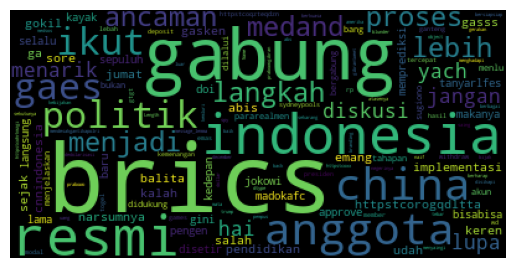

In [60]:
word_cloud_ovr = WordCloud().generate(str(df['message_lemma']))
plot_cloud(word_cloud_ovr)

In [861]:
# Expanded lexicon-based sentiment dictionary
positive_words = {
    "resmi", "masuk", "anggota", "ekonomi", "bisa", "penuh", 
    "menjadi", "lebih", "global", "besar", "bergabung", "sebagai"
}

negative_words = {
    "apa", "trump", "akan", "rusia", "mau", "tidak", "bukan", "belum", 
    "ancaman", "krisis", "sulit", "masalah", "buruk", "jatuh", "melemah"
}

# Function to classify sentiment based on lexicon approach
def classify_sentiment(text):
    words = set(re.findall(r'\b\w+\b', text.lower()))  # Tokenize and get unique words
    pos_count = len(words & positive_words)  # Count positive words
    neg_count = len(words & negative_words)  # Count negative words
    
    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification to dataset
df["sentiment"] = df["message_lemma"].dropna().apply(classify_sentiment)

# Display sentiment distribution
df["sentiment"].value_counts()

sentiment
Positive    1054
Neutral      369
Negative      82
Name: count, dtype: int64

70% of the tweets of are positive, while only 5% of the tweets are negative. The analysi can not differentiate between positive tweets and buzzer's tweets, beside removing duplicates.

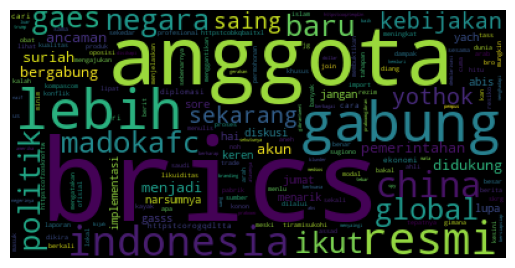

In [62]:
word_cloud_positive = WordCloud().generate(str(df[df['sentiment'] == 'Positive']['message_lemma']))
plot_cloud(word_cloud_positive)

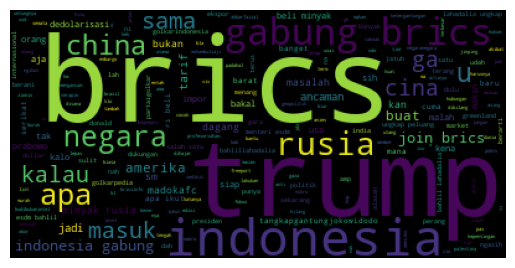

In [63]:
word_cloud_negative = WordCloud().generate(str(df[df['sentiment'] == 'Negative']['message_lemma']))
plot_cloud(word_cloud_negative)

<Axes: ylabel='kata'>

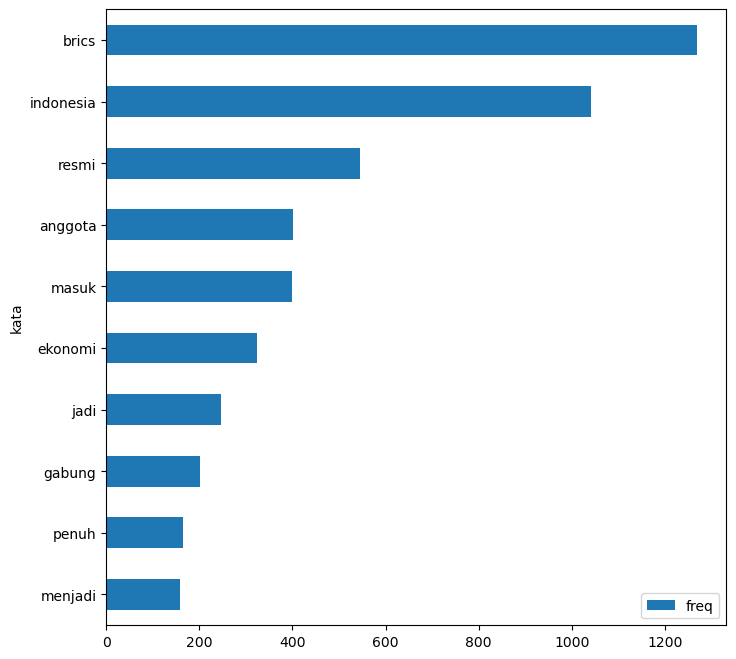

In [612]:
word_freq_sms = word_freq(df[df['sentiment']=='Positive']['message_lemma'])
word_freq_sms[-10:].plot (kind = 'barh', figsize=(8,8))

<Axes: ylabel='kata'>

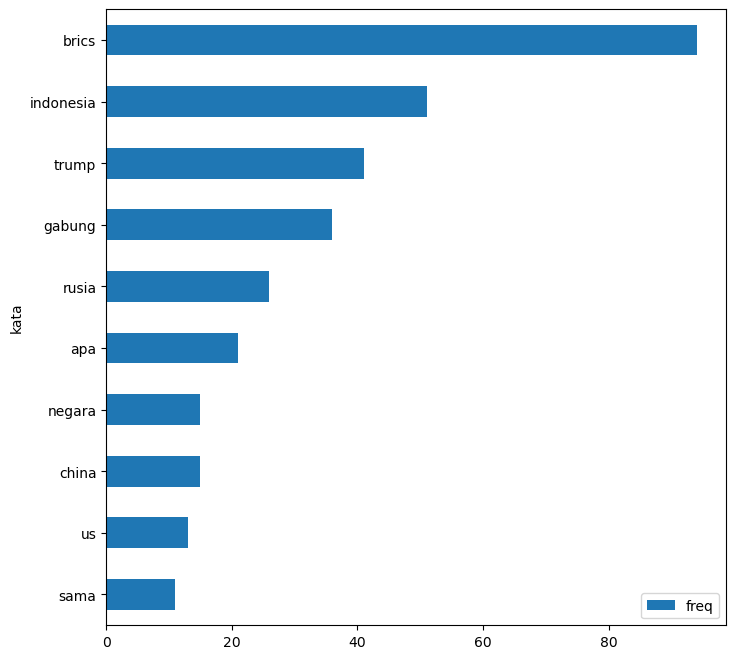

In [614]:
word_freq_sms = word_freq(df[df['sentiment']=='Negative']['message_lemma'])
word_freq_sms[-10:].plot (kind = 'barh', figsize=(8,8))

<Axes: ylabel='kata'>

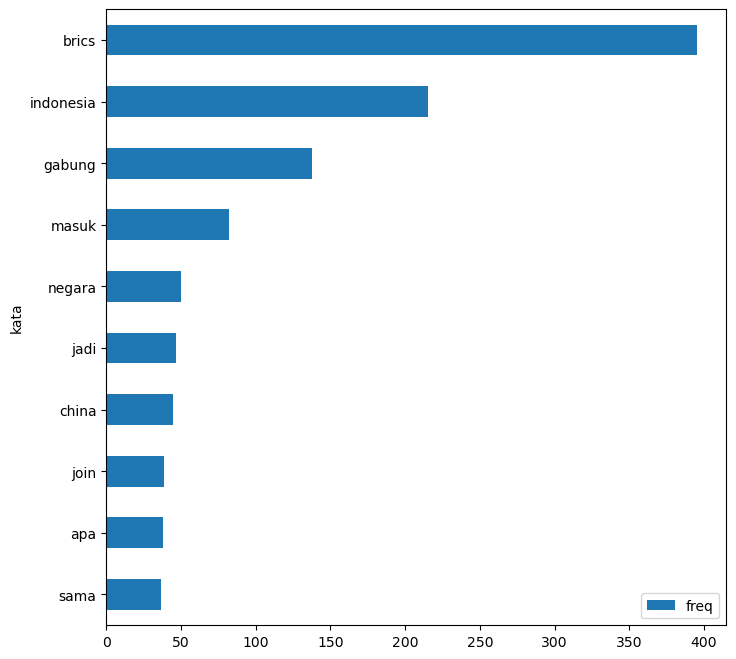

In [616]:
word_freq_sms = word_freq(df[df['sentiment']=='Neutral']['message_lemma'])
word_freq_sms[-10:].plot (kind = 'barh', figsize=(8,8))

In [630]:
word_freq_sms = word_freq(df[df['sentiment']=='Positive']['message_lemma'])
word_freq_sms[-10:].sort_values(by='freq', ascending=False)

,kata,freq
kata,,
brics,brics,1268
indonesia,indonesia,1042
resmi,resmi,546
anggota,anggota,401
masuk,masuk,400
ekonomi,ekonomi,325
jadi,jadi,246
gabung,gabung,202
penuh,penuh,166


In [632]:
word_freq_sms = word_freq(df[df['sentiment']=='Negative']['message_lemma'])
word_freq_sms[-10:].sort_values(by='freq', ascending=False)

,kata,freq
kata,,
brics,brics,94
indonesia,indonesia,51
trump,trump,41
gabung,gabung,36
rusia,rusia,26
apa,apa,21
china,china,15
negara,negara,15
us,us,13


In [634]:
word_freq_sms = word_freq(df[df['sentiment']=='Neutral']['message_lemma'])
word_freq_sms[-10:].sort_values(by='freq', ascending=False)

,kata,freq
kata,,
brics,brics,395
indonesia,indonesia,215
gabung,gabung,138
masuk,masuk,82
negara,negara,50
jadi,jadi,47
china,china,45
join,join,39
apa,apa,38


The 70% positive sentiments shows strong public support, viewing decision as strategic move with significant benefits. The 24,5% neutral sentiments suggests that many are uncertain or undecided. The 5,3% negative sentiments is small but important, reflecting minority concerns.

# Modelling

**NLP Before Tuning**

To create text classification model, we will use NLP model, since deep-learning model are more suited for text classification rather than the machine learning model. The model will be modelled using baseline model and the tuned one. Compare the two models to choose the final model.

In [916]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1️⃣ Load and Prepare Data
df['flag'] = np.where(df['sentiment']=='Positive', 0, 1)  # Label encoding
X = df['message_lemma'].astype(str)  # Ensure text data is string
y = df['flag'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Tokenization & Padding
max_features = 10000  # Max vocabulary size
maxlen = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

# 3️⃣ Build LSTM Model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True)),  # BiLSTM for bidirectional context
    Dropout(0.3),
    Bidirectional(LSTM(32)),  # Another LSTM layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 4️⃣ Train Model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,  # Start with 10 epochs (tune if needed)
    batch_size=128,
    verbose=1
)

# 5️⃣ Evaluate Model
y_pred_probs = model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print Classification Report
print(classification_report(y_test, y_pred))


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 775ms/step - accuracy: 0.6892 - loss: 0.6467 - val_accuracy: 0.7010 - val_loss: 0.5933
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 549ms/step - accuracy: 0.6946 - loss: 0.5780 - val_accuracy: 0.7010 - val_loss: 0.5101
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 536ms/step - accuracy: 0.7583 - loss: 0.4099 - val_accuracy: 0.8505 - val_loss: 0.3543
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 626ms/step - accuracy: 0.8706 - loss: 0.2956 - val_accuracy: 0.8040 - val_loss: 0.4905
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 531ms/step - accuracy: 0.9375 - loss: 0.2255 - val_accuracy: 0.8206 - val_loss: 0.4423
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 577ms/step - accuracy: 0.9395 - loss: 0.1867 - val_accuracy: 0.8272 - val_loss: 0.4227
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 618ms/step - accuracy: 0.9719 - loss: 0.1040 - val_accuracy: 0.8439 - val_loss: 0.4294
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 602ms/step - accuracy: 0.9750 - loss: 0.0857 - val_accuracy: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
ROC-AUC Score: 0.9314


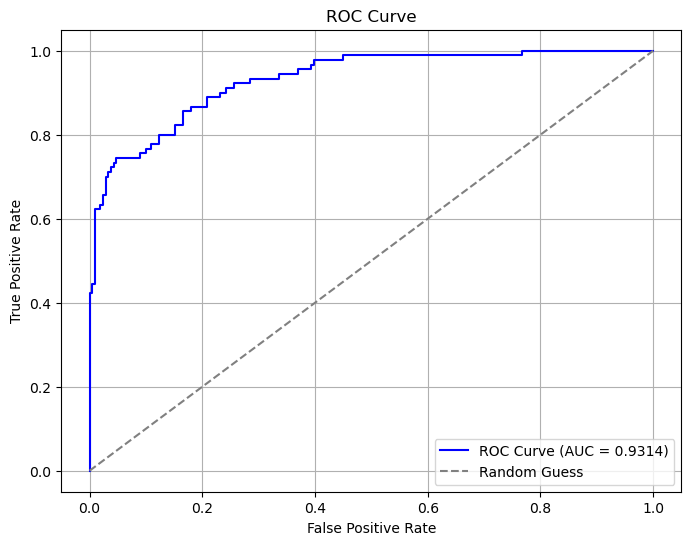

In [918]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities (for positive class `1`)
y_pred_probs = best_model.predict(X_test_pad)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

The evaluation metrics shows that the model could predict whether the tweet is positive or non-positive comment.

**NLP After Tuning**

NLP model will be tuned using hyperparameter tuning and will be compared to the before tuned.

In [934]:
# Load and Prepare Data
df['flag'] = np.where(df['sentiment']=='Positive', 0, 1)  # Label encoding
X = df['message_lemma'].astype(str)  # Ensure text data is string
y = df['flag'].to_numpy()  # Convert to NumPy array

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tokenization & Padding
max_features = 20000  # Increase vocabulary size for better word coverage
maxlen = 150  # Increase max sequence length for longer texts

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')


In [936]:
import keras_tuner as kt
from tensorflow.keras.layers import LSTM, GRU

def build_model(hp):
    # Choose LSTM or GRU using string mapping
    rnn_type = hp.Choice('rnn_type', ['LSTM', 'GRU'])
    
    model = Sequential([
        Embedding(
            input_dim=max_features, 
            output_dim=hp.Choice('embedding_size', [64, 128, 256]),  # Tune embedding size
            input_length=maxlen
        ),
        
        # Select the RNN type based on choice
        Bidirectional(
            LSTM(hp.Choice('rnn_units', [32, 64, 128]), return_sequences=True) if rnn_type == 'LSTM' 
            else GRU(hp.Choice('rnn_units', [32, 64, 128]), return_sequences=True)
        ),
        
        Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.4])),
        Bidirectional(LSTM(32)),  # Fixed second LSTM layer
        Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.4])),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0005, 0.001, 0.002])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define the tuner (Bayesian Optimization for efficiency)
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=12,  # Increased for more exploration
    executions_per_trial=2,
    directory='tuner_results',
    project_name='brics_sentiment_greedy'
)

# ✅ FIX: Remove hp.Choice() from tuner.search() and use fixed batch_size
tuner.search(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=7, batch_size=128)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=15, batch_size=128, verbose=1)

# Evaluate Model
y_pred_probs = best_model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Reloading Tuner from tuner_results\brics_sentiment_greedy\tuner0.json
Best Hyperparameters: {'rnn_type': 'GRU', 'embedding_size': 128, 'rnn_units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.002}


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 600ms/step - accuracy: 0.5939 - loss: 0.6396 - val_accuracy: 0.7010 - val_loss: 0.5372
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.7537 - loss: 0.4523 - val_accuracy: 0.8538 - val_loss: 0.3575
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.9514 - loss: 0.1983 - val_accuracy: 0.8239 - val_loss: 0.4766
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.9517 - loss: 0.1453 - val_accuracy: 0.8870 - val_loss: 0.3631
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.9817 - loss: 0.0667 - val_accuracy: 0.8738 - val_loss: 0.3609
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 428ms/step - accuracy: 0.9961 - loss: 0.0319 - val_accuracy: 0.8937 - val_loss: 0.3596
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 389ms/step - accuracy: 1.0000 - loss: 0.0194 - val_accuracy: 0.9003 - val_loss: 0.3934
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
ROC-AUC Score: 0.9421


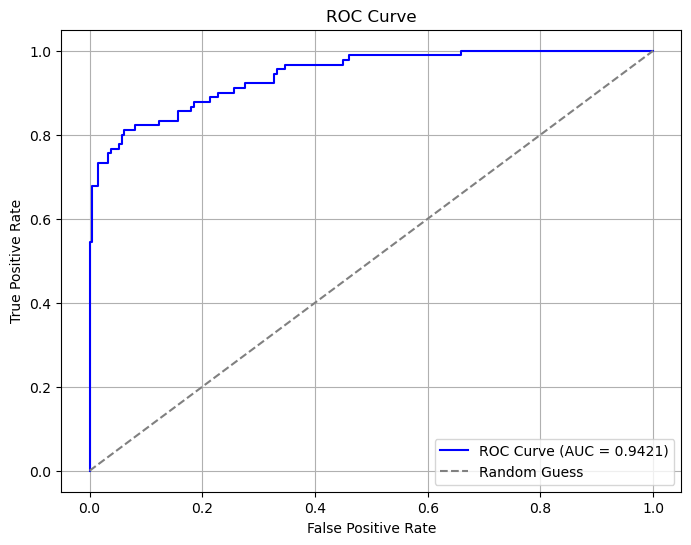

In [937]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities (for positive class `1`)
y_pred_probs = best_model.predict(X_test_pad)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

**Modelling Results**  

Since the model improved after tuning, the tuned model will be chosen as the final model.  

The model achieves an **F1-score of10.89**, indicating a strong balance between precision and recall. **Class 1 represents positive sentiment**, while **Class 0 includes both negative and neutral sentiments**. Precision is high for both classes, but recall for class 1 is lower (0.73 vs. 0.97 for class 0), suggesting a slight bias toward class 0. Addressing this imbalance could further enhance performance. The **F1-score and ROC-AUC Curve** confirm that the model effectively differentiates between positive and non-positive sentiments.

# CHALLENGES AND LIMITATION

**Challenges**
- Limited API Access & Data Restriction
- Long Scrapping Time
- Small dataset due to data range constrains
- Bot & spam detection complexity


**Limitations**
- Data source constraints
- Data range constraints
- Limited Multimodal analysis
- Can only detect positive and non-positive sentiment.

The limitations arise because the phenomenon has only recently occured.

# CONCLUSION

- 70% of analyzed tweets show positive sentiment, indicating strong public support for Indonesia's decision to join BRICS.
- Based on the accuracy score, this model can correctly detect positive or negative sentiment 90% of the time.
- The positive sentiment can be used to build legitimacy for Indonesia's BRICS membership in domestic and international forums.

# RECOMMENDATION

**MODEL RECOMMENDATION**
- Increase Dataset Size by expanding the dataset can enhance model performance and provide more comprehensive sentiment coverage.
- Improve Recall for Negative Sentiment (Class 1): Optimizing the model to boost recall for positive sentiment detection, ensuring a more accurate sentiment classification.
- Implement Text Similarity Analysis for Buzzer Detection: Utilizing advanced text similarity techniques to distinguish organic opinions from coordinated buzzer activities.


**RECOMMENDATION**
- Positive public sentiment on Indonesia can be leveraged by the Ministry of Foreign Affairs (Kemlu) to strengthen diplomatic communication and public relations strategies.
- The positive sentiment can serve as a foundation to attract investments and expand economic cooperation with BRICS nations.
- Anticipating Potential Negative Sentiment in the Future by developing mitigation strategies to address potential negative sentiment, including swift media clarification in response to any negative issues related to BRICS.